In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [1]:
file = "C:/Users/IROANYA/Documents/DATA ANALYSIS FILES/sales_data_sample1.csv"

In [4]:
dt = pd.read_csv(file, encoding = "unicode_escape")

In [5]:
df = dt.copy()

In [6]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,05/07/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,07/01/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [7]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [8]:
df.shape

(2823, 25)

In [9]:
df.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

# DATA CLEANING

# checcking na values

In [10]:
df.isna().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

# dropping some columns

In [11]:
df = df.drop(["SALES", "MONTH_ID", "TERRITORY", "ADDRESSLINE2", "STATE"], axis = 1)
df.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'ORDERDATE', 'STATUS', 'QTR_ID', 'YEAR_ID', 'PRODUCTLINE', 'MSRP',
       'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE', 'ADDRESSLINE1', 'CITY',
       'POSTALCODE', 'COUNTRY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   ORDERDATE         2823 non-null   object 
 5   STATUS            2823 non-null   object 
 6   QTR_ID            2823 non-null   int64  
 7   YEAR_ID           2823 non-null   int64  
 8   PRODUCTLINE       2823 non-null   object 
 9   MSRP              2823 non-null   int64  
 10  PRODUCTCODE       2823 non-null   object 
 11  CUSTOMERNAME      2823 non-null   object 
 12  PHONE             2823 non-null   object 
 13  ADDRESSLINE1      2823 non-null   object 
 14  CITY              2823 non-null   object 
 15  POSTALCODE        2747 non-null   object 
 16  COUNTRY           2823 non-null   object 


# creating a new sales column

In [13]:
df["SALES"] = df["QUANTITYORDERED"] * df["PRICEEACH"]

In [14]:
pd.set_option("display.max.columns", None)

In [15]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,ORDERDATE,STATUS,QTR_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,SALES
0,10107,30,95.70,2,2/24/2003 0:00,Shipped,1,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small,2871.00
1,10121,34,81.35,5,05/07/2003 0:00,Shipped,2,2003,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small,2765.90
2,10134,41,94.74,2,07/01/2003 0:00,Shipped,3,2003,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium,3884.34
3,10145,45,83.26,6,8/25/2003 0:00,Shipped,3,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium,3746.70
4,10159,49,100.00,14,10/10/2003 0:00,Shipped,4,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,San Francisco,NaN,USA,Brown,Julie,Medium,4900.00


# bringing it closer to the price column

In [16]:
def move(x, y):

    col = df.pop(x)
    df.insert(y, x, col)


In [17]:
move("SALES", 3)

In [18]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,SALES,ORDERLINENUMBER,ORDERDATE,STATUS,QTR_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2871.00,2,2/24/2003 0:00,Shipped,1,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,2765.90,5,05/07/2003 0:00,Shipped,2,2003,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74,3884.34,2,07/01/2003 0:00,Shipped,3,2003,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,3746.70,6,8/25/2003 0:00,Shipped,3,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10159,49,100.00,4900.00,14,10/10/2003 0:00,Shipped,4,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,San Francisco,NaN,USA,Brown,Julie,Medium


# combining the first name and last name columns and dropping them

In [19]:
df["CONTACTNAME"] = df["CONTACTLASTNAME"] + " " + df["CONTACTFIRSTNAME"]
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,SALES,ORDERLINENUMBER,ORDERDATE,STATUS,QTR_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,CONTACTNAME
0,10107,30,95.70,2871.00,2,2/24/2003 0:00,Shipped,1,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small,Yu Kwai
1,10121,34,81.35,2765.90,5,05/07/2003 0:00,Shipped,2,2003,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small,Henriot Paul
2,10134,41,94.74,3884.34,2,07/01/2003 0:00,Shipped,3,2003,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium,Da Cunha Daniel
3,10145,45,83.26,3746.70,6,8/25/2003 0:00,Shipped,3,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium,Young Julie
4,10159,49,100.00,4900.00,14,10/10/2003 0:00,Shipped,4,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,San Francisco,NaN,USA,Brown,Julie,Medium,Brown Julie


In [20]:
df = df.drop(["CONTACTLASTNAME", "CONTACTFIRSTNAME"], axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ORDERNUMBER      2823 non-null   int64  
 1   QUANTITYORDERED  2823 non-null   int64  
 2   PRICEEACH        2823 non-null   float64
 3   SALES            2823 non-null   float64
 4   ORDERLINENUMBER  2823 non-null   int64  
 5   ORDERDATE        2823 non-null   object 
 6   STATUS           2823 non-null   object 
 7   QTR_ID           2823 non-null   int64  
 8   YEAR_ID          2823 non-null   int64  
 9   PRODUCTLINE      2823 non-null   object 
 10  MSRP             2823 non-null   int64  
 11  PRODUCTCODE      2823 non-null   object 
 12  CUSTOMERNAME     2823 non-null   object 
 13  PHONE            2823 non-null   object 
 14  ADDRESSLINE1     2823 non-null   object 
 15  CITY             2823 non-null   object 
 16  POSTALCODE       2747 non-null   object 
 17  COUNTRY       

In [21]:
move("CONTACTNAME", 13)
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,SALES,ORDERLINENUMBER,ORDERDATE,STATUS,QTR_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,CONTACTNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,DEALSIZE
0,10107,30,95.70,2871.00,2,2/24/2003 0:00,Shipped,1,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,Yu Kwai,2125557818,897 Long Airport Avenue,NYC,10022,USA,Small
1,10121,34,81.35,2765.90,5,05/07/2003 0:00,Shipped,2,2003,Motorcycles,95,S10_1678,Reims Collectables,Henriot Paul,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Small
2,10134,41,94.74,3884.34,2,07/01/2003 0:00,Shipped,3,2003,Motorcycles,95,S10_1678,Lyon Souveniers,Da Cunha Daniel,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Medium
3,10145,45,83.26,3746.70,6,8/25/2003 0:00,Shipped,3,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,Young Julie,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Medium
4,10159,49,100.00,4900.00,14,10/10/2003 0:00,Shipped,4,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,Brown Julie,6505551386,7734 Strong St.,San Francisco,NaN,USA,Medium


# converting the orderdate to a date time format

In [22]:
df["ORDERDATE"] = pd.to_datetime(df["ORDERDATE"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ORDERNUMBER      2823 non-null   int64         
 1   QUANTITYORDERED  2823 non-null   int64         
 2   PRICEEACH        2823 non-null   float64       
 3   SALES            2823 non-null   float64       
 4   ORDERLINENUMBER  2823 non-null   int64         
 5   ORDERDATE        2823 non-null   datetime64[ns]
 6   STATUS           2823 non-null   object        
 7   QTR_ID           2823 non-null   int64         
 8   YEAR_ID          2823 non-null   int64         
 9   PRODUCTLINE      2823 non-null   object        
 10  MSRP             2823 non-null   int64         
 11  PRODUCTCODE      2823 non-null   object        
 12  CUSTOMERNAME     2823 non-null   object        
 13  CONTACTNAME      2823 non-null   object        
 14  PHONE            2823 non-null   object 

In [23]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,SALES,ORDERLINENUMBER,ORDERDATE,STATUS,QTR_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,CONTACTNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,DEALSIZE
0,10107,30,95.70,2871.00,2,2003-02-24,Shipped,1,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,Yu Kwai,2125557818,897 Long Airport Avenue,NYC,10022,USA,Small
1,10121,34,81.35,2765.90,5,2003-05-07,Shipped,2,2003,Motorcycles,95,S10_1678,Reims Collectables,Henriot Paul,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Small
2,10134,41,94.74,3884.34,2,2003-07-01,Shipped,3,2003,Motorcycles,95,S10_1678,Lyon Souveniers,Da Cunha Daniel,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Medium
3,10145,45,83.26,3746.70,6,2003-08-25,Shipped,3,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,Young Julie,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Medium
4,10159,49,100.00,4900.00,14,2003-10-10,Shipped,4,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,Brown Julie,6505551386,7734 Strong St.,San Francisco,NaN,USA,Medium


# creating a month column

In [24]:
df["MONTH"] = df["ORDERDATE"].dt.month_name()
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,SALES,ORDERLINENUMBER,ORDERDATE,STATUS,QTR_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,CONTACTNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,DEALSIZE,MONTH
0,10107,30,95.70,2871.00,2,2003-02-24,Shipped,1,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,Yu Kwai,2125557818,897 Long Airport Avenue,NYC,10022,USA,Small,February
1,10121,34,81.35,2765.90,5,2003-05-07,Shipped,2,2003,Motorcycles,95,S10_1678,Reims Collectables,Henriot Paul,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Small,May
2,10134,41,94.74,3884.34,2,2003-07-01,Shipped,3,2003,Motorcycles,95,S10_1678,Lyon Souveniers,Da Cunha Daniel,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Medium,July
3,10145,45,83.26,3746.70,6,2003-08-25,Shipped,3,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,Young Julie,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Medium,August
4,10159,49,100.00,4900.00,14,2003-10-10,Shipped,4,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,Brown Julie,6505551386,7734 Strong St.,San Francisco,NaN,USA,Medium,October


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ORDERNUMBER      2823 non-null   int64         
 1   QUANTITYORDERED  2823 non-null   int64         
 2   PRICEEACH        2823 non-null   float64       
 3   SALES            2823 non-null   float64       
 4   ORDERLINENUMBER  2823 non-null   int64         
 5   ORDERDATE        2823 non-null   datetime64[ns]
 6   STATUS           2823 non-null   object        
 7   QTR_ID           2823 non-null   int64         
 8   YEAR_ID          2823 non-null   int64         
 9   PRODUCTLINE      2823 non-null   object        
 10  MSRP             2823 non-null   int64         
 11  PRODUCTCODE      2823 non-null   object        
 12  CUSTOMERNAME     2823 non-null   object        
 13  CONTACTNAME      2823 non-null   object        
 14  PHONE            2823 non-null   object 

In [26]:
move("MONTH", 8)
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,SALES,ORDERLINENUMBER,ORDERDATE,STATUS,QTR_ID,MONTH,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,CONTACTNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,DEALSIZE
0,10107,30,95.70,2871.00,2,2003-02-24,Shipped,1,February,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,Yu Kwai,2125557818,897 Long Airport Avenue,NYC,10022,USA,Small
1,10121,34,81.35,2765.90,5,2003-05-07,Shipped,2,May,2003,Motorcycles,95,S10_1678,Reims Collectables,Henriot Paul,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Small
2,10134,41,94.74,3884.34,2,2003-07-01,Shipped,3,July,2003,Motorcycles,95,S10_1678,Lyon Souveniers,Da Cunha Daniel,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Medium
3,10145,45,83.26,3746.70,6,2003-08-25,Shipped,3,August,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,Young Julie,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Medium
4,10159,49,100.00,4900.00,14,2003-10-10,Shipped,4,October,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,Brown Julie,6505551386,7734 Strong St.,San Francisco,NaN,USA,Medium


# filling na values with unknown

In [27]:
def nan(df):
    nan = df.isna().sum().reset_index()
    nan.columns = ["columns", "counts"]
    nan
    missing = nan[nan["counts"] > 0]
    m_s =  np.array(missing["columns"])
    return m_s

In [28]:
x = nan(df)
x

array(['POSTALCODE'], dtype=object)

In [29]:
for i in x:
    df = df.fillna("UNKNOWN")
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,SALES,ORDERLINENUMBER,ORDERDATE,STATUS,QTR_ID,MONTH,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,CONTACTNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,DEALSIZE
0,10107,30,95.70,2871.00,2,2003-02-24,Shipped,1,February,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,Yu Kwai,2125557818,897 Long Airport Avenue,NYC,10022,USA,Small
1,10121,34,81.35,2765.90,5,2003-05-07,Shipped,2,May,2003,Motorcycles,95,S10_1678,Reims Collectables,Henriot Paul,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Small
2,10134,41,94.74,3884.34,2,2003-07-01,Shipped,3,July,2003,Motorcycles,95,S10_1678,Lyon Souveniers,Da Cunha Daniel,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Medium
3,10145,45,83.26,3746.70,6,2003-08-25,Shipped,3,August,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,Young Julie,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Medium
4,10159,49,100.00,4900.00,14,2003-10-10,Shipped,4,October,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,Brown Julie,6505551386,7734 Strong St.,San Francisco,UNKNOWN,USA,Medium


# creating an expected sales column

In [30]:
df["EXP_SALES"] = df["MSRP"] * df["QUANTITYORDERED"]

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ORDERNUMBER      2823 non-null   int64         
 1   QUANTITYORDERED  2823 non-null   int64         
 2   PRICEEACH        2823 non-null   float64       
 3   SALES            2823 non-null   float64       
 4   ORDERLINENUMBER  2823 non-null   int64         
 5   ORDERDATE        2823 non-null   datetime64[ns]
 6   STATUS           2823 non-null   object        
 7   QTR_ID           2823 non-null   int64         
 8   MONTH            2823 non-null   object        
 9   YEAR_ID          2823 non-null   int64         
 10  PRODUCTLINE      2823 non-null   object        
 11  MSRP             2823 non-null   int64         
 12  PRODUCTCODE      2823 non-null   object        
 13  CUSTOMERNAME     2823 non-null   object        
 14  CONTACTNAME      2823 non-null   object 

In [32]:
move("MSRP", 4)
move("EXP_SALES",  5)
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,SALES,MSRP,EXP_SALES,ORDERLINENUMBER,ORDERDATE,STATUS,QTR_ID,MONTH,YEAR_ID,PRODUCTLINE,PRODUCTCODE,CUSTOMERNAME,CONTACTNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,DEALSIZE
0,10107,30,95.70,2871.00,95,2850,2,2003-02-24,Shipped,1,February,2003,Motorcycles,S10_1678,Land of Toys Inc.,Yu Kwai,2125557818,897 Long Airport Avenue,NYC,10022,USA,Small
1,10121,34,81.35,2765.90,95,3230,5,2003-05-07,Shipped,2,May,2003,Motorcycles,S10_1678,Reims Collectables,Henriot Paul,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Small
2,10134,41,94.74,3884.34,95,3895,2,2003-07-01,Shipped,3,July,2003,Motorcycles,S10_1678,Lyon Souveniers,Da Cunha Daniel,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Medium
3,10145,45,83.26,3746.70,95,4275,6,2003-08-25,Shipped,3,August,2003,Motorcycles,S10_1678,Toys4GrownUps.com,Young Julie,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Medium
4,10159,49,100.00,4900.00,95,4655,14,2003-10-10,Shipped,4,October,2003,Motorcycles,S10_1678,Corporate Gift Ideas Co.,Brown Julie,6505551386,7734 Strong St.,San Francisco,UNKNOWN,USA,Medium


# creating a profit/loss column

In [33]:
df["PROFIT/LOSS"] = df["EXP_SALES"] - df["SALES"]

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ORDERNUMBER      2823 non-null   int64         
 1   QUANTITYORDERED  2823 non-null   int64         
 2   PRICEEACH        2823 non-null   float64       
 3   SALES            2823 non-null   float64       
 4   MSRP             2823 non-null   int64         
 5   EXP_SALES        2823 non-null   int64         
 6   ORDERLINENUMBER  2823 non-null   int64         
 7   ORDERDATE        2823 non-null   datetime64[ns]
 8   STATUS           2823 non-null   object        
 9   QTR_ID           2823 non-null   int64         
 10  MONTH            2823 non-null   object        
 11  YEAR_ID          2823 non-null   int64         
 12  PRODUCTLINE      2823 non-null   object        
 13  PRODUCTCODE      2823 non-null   object        
 14  CUSTOMERNAME     2823 non-null   object 

In [35]:
move("PROFIT/LOSS", 6)
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,SALES,MSRP,EXP_SALES,PROFIT/LOSS,ORDERLINENUMBER,ORDERDATE,STATUS,QTR_ID,MONTH,YEAR_ID,PRODUCTLINE,PRODUCTCODE,CUSTOMERNAME,CONTACTNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,DEALSIZE
0,10107,30,95.70,2871.00,95,2850,-21.00,2,2003-02-24,Shipped,1,February,2003,Motorcycles,S10_1678,Land of Toys Inc.,Yu Kwai,2125557818,897 Long Airport Avenue,NYC,10022,USA,Small
1,10121,34,81.35,2765.90,95,3230,464.10,5,2003-05-07,Shipped,2,May,2003,Motorcycles,S10_1678,Reims Collectables,Henriot Paul,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Small
2,10134,41,94.74,3884.34,95,3895,10.66,2,2003-07-01,Shipped,3,July,2003,Motorcycles,S10_1678,Lyon Souveniers,Da Cunha Daniel,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Medium
3,10145,45,83.26,3746.70,95,4275,528.30,6,2003-08-25,Shipped,3,August,2003,Motorcycles,S10_1678,Toys4GrownUps.com,Young Julie,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Medium
4,10159,49,100.00,4900.00,95,4655,-245.00,14,2003-10-10,Shipped,4,October,2003,Motorcycles,S10_1678,Corporate Gift Ideas Co.,Brown Julie,6505551386,7734 Strong St.,San Francisco,UNKNOWN,USA,Medium


# EXPORTING THE FILE AS A CSV

In [71]:
df.to_csv(r"C:\Users\IROANYA\Documents\DATA ANALYSIS FILES\PYTHON CLASS\project\sales3.csv")

# DATA VISUALIZATION

In [104]:
df["YEAR_ID"].value_counts()

2004    1345
2003    1000
2005     478
Name: YEAR_ID, dtype: int64

# status of products in the year with highest profit

<AxesSubplot:>

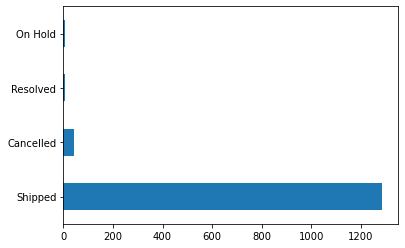

In [108]:
yr4["STATUS"].value_counts().plot(kind = "barh")

# month with highest profit in 2004

<BarContainer object of 5 artists>

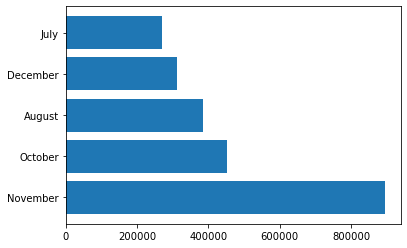

In [109]:
month_yr4 = yr4.groupby("MONTH")["SALES"].sum().reset_index()
month_yr4.columns = ["Months", "Total sales"]
t_5  = month_yr4.sort_values(by = "Total sales", ascending = False).head(5)
t_5
plt.barh(t_5["Months"], t_5["Total sales"])

# quarter with the highest profit per year

In [110]:
def q_high(yr):
    yrs = df[(df.YEAR_ID) == yr]
    quarter = yrs.groupby("QTR_ID")["SALES"].sum()
    quarter.plot(kind = "barh")

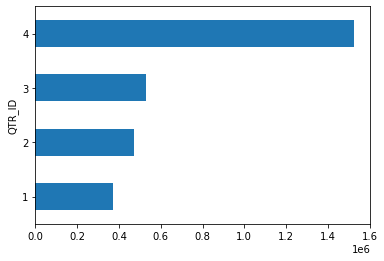

In [111]:
q_high(2003)

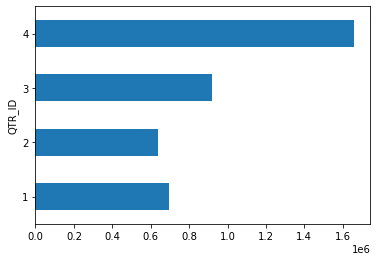

In [112]:
q_high(2004)

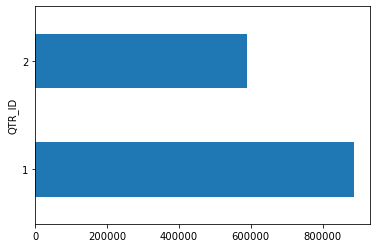

In [113]:
q_high(2005)

In [84]:
df.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'SALES',
       'ORDERLINENUMBER', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'CONTACTNAME',
       'PHONE', 'ADDRESSLINE1', 'CITY', 'POSTALCODE', 'COUNTRY', 'DEALSIZE'],
      dtype='object')

# product they sell the most

<AxesSubplot:>

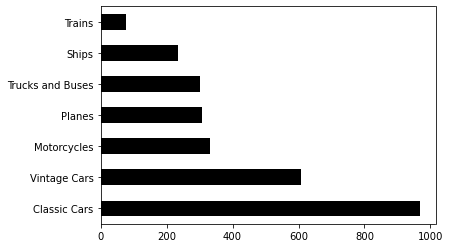

In [114]:
prod = df["PRODUCTLINE"].value_counts()
prod.plot(kind = "barh", color = "black")

# product with highest profit per year

In [115]:
def yr_high(yr):
    yrs = df[(df.YEAR_ID) == yr]
    quarter = yrs.groupby("PRODUCTLINE")["SALES"].sum()
    quarter.plot(kind = "barh", color = "red")

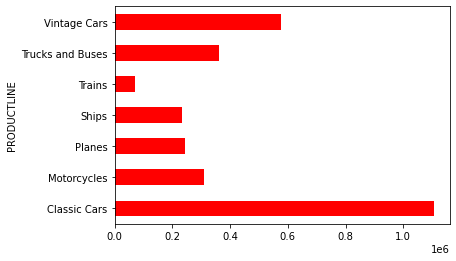

In [116]:
yr_high(2003)

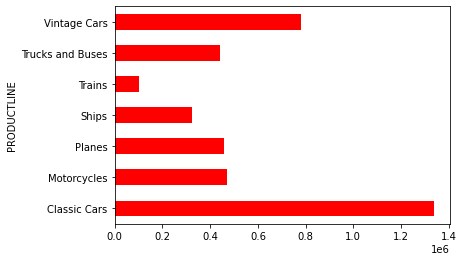

In [117]:
yr_high(2004)

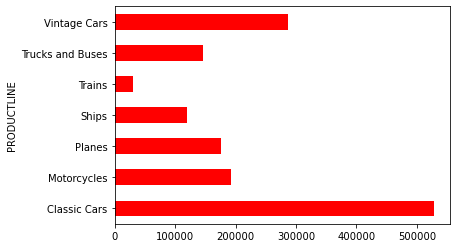

In [118]:
yr_high(2005)

# cities in a country that ordered  products based on the dealsize

In [119]:
def city_vin(country, product, dealsize):
    count = df[(df.COUNTRY) == country]
    vin = count[(count.PRODUCTLINE) == product]
    med = vin[(vin.DEALSIZE) == dealsize]
    med["CITY"].value_counts().plot(kind = "barh")

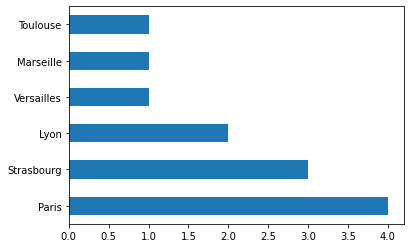

In [120]:
city_vin("France", "Classic Cars", "Large")

# most active country

<AxesSubplot:ylabel='country'>

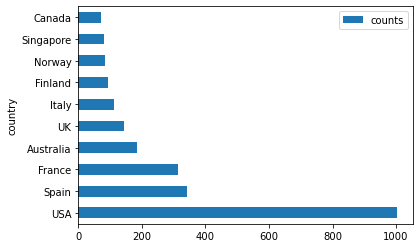

In [121]:
countries = df["COUNTRY"].value_counts().reset_index()
countries.columns = ["country", "counts"]
t_10 = countries.head(10)
t_10.plot(kind = "barh", x ="country", y = "counts")

In [46]:
t_10.to_csv(r"C:\Users\IROANYA\Documents\DATA ANALYSIS FILES\PYTHON CLASS\project\t_10.csv")

In [122]:
usa = df[(df.COUNTRY) == "USA"]
# usa.head()
vintage = usa[(usa.PRODUCTLINE) == "Vintage Cars"]
# vintage.head()
med = vintage[(vintage.DEALSIZE) == "Medium"]
us_10 = med["CITY"].value_counts().reset_index().head(10)
us_10.columns = ["City", "Counts"]
us_10

,City,Counts
0,San Rafael,22
1,NYC,14
2,San Francisco,11
3,Nashua,6
4,Brickhaven,6
5,San Jose,6
6,New Bedford,6
7,Brisbane,5
8,Boston,5
9,San Diego,4


In [53]:
us_10.to_csv(r"C:\Users\IROANYA\Documents\DATA ANALYSIS FILES\PYTHON CLASS\project\us_10.csv")

In [143]:
def ms_price(x):
    prod = df[(df.PRODUCTLINE) ==  x]
    avg = prod.groupby("MSRP")["PRICEEACH"].mean().reset_index()
    avg.columns = ["MSRP", "AVERAGE PRICE SOLD"]
    avgs = avg.sort_values(by = "AVERAGE PRICE SOLD", ascending=False).head(10)
    avgs.plot(kind = "bar", x = "MSRP", y = "AVERAGE PRICE SOLD")


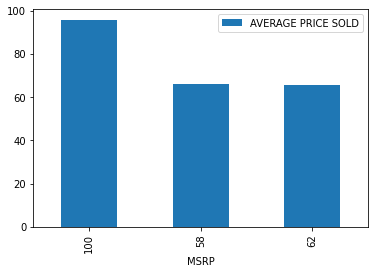

In [144]:
a = ms_price("Trains")

# avgs

# year with highest profit

<AxesSubplot:xlabel='YEAR_ID'>

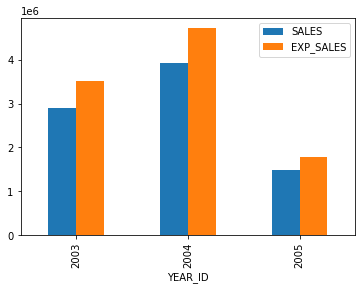

In [49]:
yrs = df.groupby("YEAR_ID")[["SALES", "EXP_SALES"]].sum()
yrs
yrs.plot(kind = "bar")

In [50]:
yrs.to_csv(r"C:\Users\IROANYA\Documents\DATA ANALYSIS FILES\PYTHON CLASS\project\yrs2.csv")

# ANALYSIS OF 2004

In [38]:
yr4 =  df[(df.YEAR_ID) == 2004]
yr4.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,SALES,MSRP,EXP_SALES,PROFIT/LOSS,ORDERLINENUMBER,ORDERDATE,STATUS,QTR_ID,MONTH,YEAR_ID,PRODUCTLINE,PRODUCTCODE,CUSTOMERNAME,CONTACTNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,DEALSIZE
9,10211,41,100.0,4100.0,95,3895,-205.0,14,2004-01-15,Shipped,1,January,2004,Motorcycles,S10_1678,Auto Canal Petit,Perrier Dominique,(1) 47.55.6555,"25, rue Lauriston",Paris,75016,France,Medium
10,10223,37,100.0,3700.0,95,3515,-185.0,1,2004-02-20,Shipped,1,February,2004,Motorcycles,S10_1678,"Australian Collectors, Co.",Ferguson Peter,03 9520 4555,636 St Kilda Road,Melbourne,3004,Australia,Medium
11,10237,23,100.0,2300.0,95,2185,-115.0,7,2004-04-05,Shipped,2,April,2004,Motorcycles,S10_1678,Vitachrome Inc.,Frick Michael,2125551500,2678 Kingston Rd.,NYC,10022,USA,Small
12,10251,28,100.0,2800.0,95,2660,-140.0,2,2004-05-18,Shipped,2,May,2004,Motorcycles,S10_1678,Tekni Collectables Inc.,Brown William,2015559350,7476 Moss Rd.,Newark,94019,USA,Medium
13,10263,34,100.0,3400.0,95,3230,-170.0,2,2004-06-28,Shipped,2,June,2004,Motorcycles,S10_1678,Gift Depot Inc.,King Julie,2035552570,25593 South Bay Ln.,Bridgewater,97562,USA,Medium


# product with highest sales

<AxesSubplot:xlabel='PRODUCTLINE'>

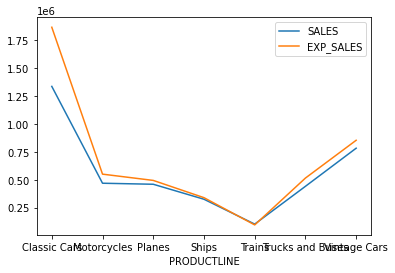

In [52]:
hsp = yr4.groupby("PRODUCTLINE")[["SALES", "EXP_SALES"]].sum()
hsp.plot(kind = "line")

In [53]:
hsp.to_csv(r"C:\Users\IROANYA\Documents\DATA ANALYSIS FILES\PYTHON CLASS\project\hsp2.csv")

# most active countries in 2004

<AxesSubplot:xlabel='Country'>

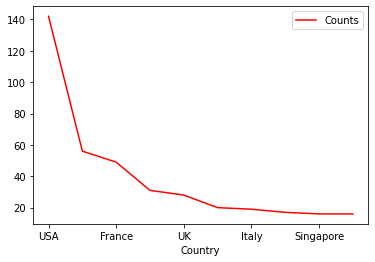

In [57]:
prod = yr4[(yr4.PRODUCTLINE) == "Classic Cars"]
# prod
count = prod["COUNTRY"].value_counts().head(10)
country = cust.reset_index()
country.columns = ["Country", "Counts"]
# custo
country.plot(kind = "line", color = "red", x = "Country")

In [58]:
country.to_csv(r"C:\Users\IROANYA\Documents\DATA ANALYSIS FILES\PYTHON CLASS\project\country.csv")

# cities in USA that were most active

<AxesSubplot:ylabel='City'>

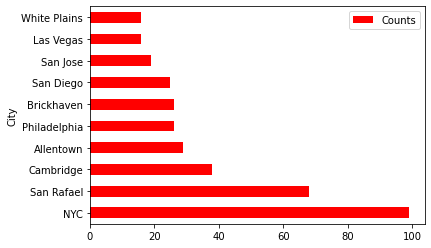

In [64]:
count = yr4[(yr4.COUNTRY) == "USA"]
cities = count["CITY"].value_counts().head(10)
city = cities.reset_index()
city.columns = ["City", "Counts"]
# custo
city.plot(kind = "barh", color = "red", x = "City")

In [65]:
city.to_csv(r"C:\Users\IROANYA\Documents\DATA ANALYSIS FILES\PYTHON CLASS\project\city.csv")

<AxesSubplot:ylabel='Company'>

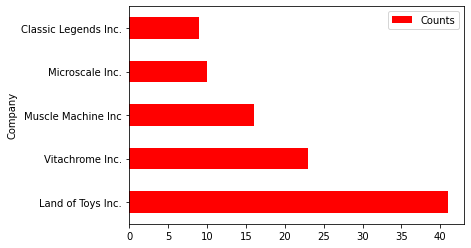

In [67]:
nyc = count[(count.CITY) == "NYC"]
cust = nyc["CUSTOMERNAME"].value_counts().head(10)
custo = cust.reset_index()
custo.columns = ["Company", "Counts"]
# custo
custo.plot(kind = "barh", color = "red", x = "Company")

In [68]:
custo.to_csv(r"C:\Users\IROANYA\Documents\DATA ANALYSIS FILES\PYTHON CLASS\project\custo2.csv")

<AxesSubplot:xlabel='PRODUCTLINE'>

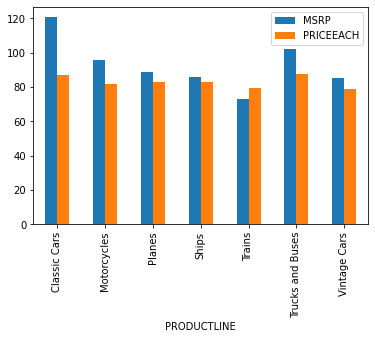

In [69]:
check = yr4.groupby("PRODUCTLINE")[["MSRP", "PRICEEACH"]].mean()
check.plot(kind = "bar")

In [70]:
check.to_csv(r"C:\Users\IROANYA\Documents\DATA ANALYSIS FILES\PYTHON CLASS\project\check.csv")